In [1]:
import os
import io
import numpy as np
import torch
import torch.onnx
import onnx
from src.crowd_count import CrowdCounter
from src import network

In [2]:
model_path = '/Users/iPrince/Downloads/Crowd Estimation using CCMTL/saved_models/cmtl_shtechA_1.pth'

In [3]:
model = CrowdCounter()

In [4]:
print(model)

CrowdCounter(
  (CCN): CMTL(
    (base_layer): Sequential(
      (0): Conv2d(
        (conv): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (relu): PReLU(num_parameters=1)
      )
      (1): Conv2d(
        (conv): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (relu): PReLU(num_parameters=1)
      )
    )
    (hl_prior_1): Sequential(
      (0): Conv2d(
        (conv): Conv2d(32, 16, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
        (relu): PReLU(num_parameters=1)
      )
      (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (2): Conv2d(
        (conv): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (relu): PReLU(num_parameters=1)
      )
      (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (4): Conv2d(
        (conv): Conv2d(32, 16, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (relu): PReLU(num_parameters=

In [5]:
import dill
model.load_state_dict(torch.load(model_path), strict=False)
print(model.state_dict())

OrderedDict([('CCN.base_layer.0.conv.weight', tensor([[[[-4.0694e-03,  1.0407e-02, -1.4446e-02,  ..., -1.7931e-02,
            9.1335e-03,  5.0918e-03],
          [-6.5098e-03, -4.5831e-03, -5.3345e-03,  ...,  8.8647e-03,
           -4.1423e-03, -1.0287e-02],
          [-9.7612e-03, -6.2813e-03, -3.2977e-03,  ...,  4.8784e-03,
           -1.1040e-02,  4.1631e-03],
          ...,
          [ 4.6749e-03, -5.5044e-03, -4.0573e-03,  ..., -4.5578e-03,
            1.2972e-02, -3.7506e-03],
          [ 3.8839e-03, -5.4501e-03, -1.4538e-02,  ..., -2.9207e-03,
            4.3057e-03,  1.9076e-02],
          [ 5.9996e-04,  6.4717e-03, -4.4016e-03,  ...,  2.8323e-03,
           -2.4059e-02,  5.8355e-03]]],


        [[[ 1.5000e-02,  1.3304e-03,  5.7629e-03,  ..., -4.4677e-03,
           -2.9917e-02,  5.7949e-03],
          [ 4.4295e-03, -1.4016e-03, -1.1129e-02,  ..., -6.6570e-03,
            9.4832e-03,  1.1974e-03],
          [-1.0056e-03, -1.0871e-02, -7.4451e-04,  ..., -1.1776e-02,
          

         [[ 0.0038]]]])), ('CCN.de_stage_2.6.conv.bias', tensor([0.0004]))])


print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

In [6]:
batch_size = 1
x = torch.randn(batch_size, 1, 224, 224)
torch_out = torch.onnx._export(model, x, "Crowd_Counting.onnx", export_params=True)

C:\Users\iPrince\Downloads\Crowd Estimation using CCMTL\src\crowd_count.py:26: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  density_cls_prob = F.softmax(density_cls_score)


In [7]:
print(torch_out)

tensor([[[[0.0016, 0.0016, 0.0016,  ..., 0.0016, 0.0016, 0.0016],
          [0.0016, 0.0017, 0.0017,  ..., 0.0017, 0.0017, 0.0015],
          [0.0016, 0.0016, 0.0017,  ..., 0.0016, 0.0017, 0.0016],
          ...,
          [0.0016, 0.0017, 0.0017,  ..., 0.0017, 0.0017, 0.0015],
          [0.0016, 0.0016, 0.0017,  ..., 0.0016, 0.0017, 0.0016],
          [0.0016, 0.0017, 0.0017,  ..., 0.0017, 0.0017, 0.0016]]]],
       grad_fn=<ReluBackward1>)


In [8]:
model_onnx = onnx.load("Crowd_Counting.onnx")
onnx.checker.check_model(model_onnx)
print(onnx.helper.printable_graph(model_onnx.graph))

graph torch-jit-export (
  %0[FLOAT, 1x1x224x224]
) initializers (
  %1[FLOAT, 16x1x9x9]
  %2[FLOAT, 16]
  %3[FLOAT, 1]
  %4[FLOAT, 32x16x7x7]
  %5[FLOAT, 32]
  %6[FLOAT, 1]
  %7[FLOAT, 16x32x9x9]
  %8[FLOAT, 16]
  %9[FLOAT, 1]
  %10[FLOAT, 32x16x7x7]
  %11[FLOAT, 32]
  %12[FLOAT, 1]
  %13[FLOAT, 16x32x7x7]
  %14[FLOAT, 16]
  %15[FLOAT, 1]
  %16[FLOAT, 8x16x7x7]
  %17[FLOAT, 8]
  %18[FLOAT, 1]
  %19[FLOAT, 4x8x1x1]
  %20[FLOAT, 4]
  %21[FLOAT, 1]
  %22[FLOAT, 512x4096]
  %23[FLOAT, 512]
  %24[FLOAT, 1]
  %25[FLOAT, 256x512]
  %26[FLOAT, 256]
  %27[FLOAT, 1]
  %28[FLOAT, 10x256]
  %29[FLOAT, 10]
  %30[FLOAT, 1]
  %31[FLOAT, 20x32x7x7]
  %32[FLOAT, 20]
  %33[FLOAT, 1]
  %34[FLOAT, 40x20x5x5]
  %35[FLOAT, 40]
  %36[FLOAT, 1]
  %37[FLOAT, 20x40x5x5]
  %38[FLOAT, 20]
  %39[FLOAT, 1]
  %40[FLOAT, 10x20x5x5]
  %41[FLOAT, 10]
  %42[FLOAT, 1]
  %43[FLOAT, 24x18x3x3]
  %44[FLOAT, 24]
  %45[FLOAT, 1]
  %46[FLOAT, 32x24x3x3]
  %47[FLOAT, 32]
  %48[FLOAT, 1]
  %49[FLOAT, 32x16x4x4]
  %50[FLOAT, 16]

In [9]:
import tensorflow as tf
import torch
import onnx
from onnx_tf.backend import prepare


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\__init__.py:87: UserWarning: FrontendHandler.get_outputs_names is deprecated. It will be removed in future release.. Use node.outputs instead.
  warnings.warn(message)


In [10]:
tf_rep = prepare(model_onnx)
print(tf_rep.tensor_dict)

C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\handler_helper.py:73: UserWarning: Unknown op ConstantFill in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\handler_helper.py:73: UserWarning: Unknown op ConstantLike in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\handler_helper.py:73: UserWarning: Unknown op DynamicSlice in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\handler_helper.py:73: UserWarning: Unknown op ImageScaler in domain `ai.onnx`.
  handler.ONNX_OP, handler.DOMAIN or "ai.onnx"))
C:\Users\iPrince\Anaconda3\lib\site-packages\onnx_tf\common\handler_helper.py:70: UserWarning: Fail to get since_version of ThresholdedRelu in domain `` with max_inclusive_version=9. Set to 1.
  handler.ONNX_OP, handler.DOMAIN, version))


{'1': <tf.Tensor 'Const:0' shape=(16, 1, 9, 9) dtype=float32>, '10': <tf.Tensor 'Const_1:0' shape=(32, 16, 7, 7) dtype=float32>, '11': <tf.Tensor 'Const_2:0' shape=(32,) dtype=float32>, '12': <tf.Tensor 'Const_3:0' shape=(1,) dtype=float32>, '13': <tf.Tensor 'Const_4:0' shape=(16, 32, 7, 7) dtype=float32>, '14': <tf.Tensor 'Const_5:0' shape=(16,) dtype=float32>, '15': <tf.Tensor 'Const_6:0' shape=(1,) dtype=float32>, '16': <tf.Tensor 'Const_7:0' shape=(8, 16, 7, 7) dtype=float32>, '17': <tf.Tensor 'Const_8:0' shape=(8,) dtype=float32>, '18': <tf.Tensor 'Const_9:0' shape=(1,) dtype=float32>, '19': <tf.Tensor 'Const_10:0' shape=(4, 8, 1, 1) dtype=float32>, '2': <tf.Tensor 'Const_11:0' shape=(16,) dtype=float32>, '20': <tf.Tensor 'Const_12:0' shape=(4,) dtype=float32>, '21': <tf.Tensor 'Const_13:0' shape=(1,) dtype=float32>, '22': <tf.Tensor 'Const_14:0' shape=(512, 4096) dtype=float32>, '23': <tf.Tensor 'Const_15:0' shape=(512,) dtype=float32>, '24': <tf.Tensor 'Const_16:0' shape=(1,) dt

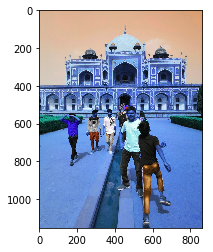

In [22]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("/Users/iPrince/Pictures/Camera Roll/test_img.jpg")
plt.imshow(img)


In [11]:
tf_rep.export_graph('/Users/iPrince/Downloads/Crowd Estimation using CCMTL/saved_models/model_tf.pb')

In [12]:
tf_rep.graph.get_operations()

[<tf.Operation 'Const' type=Const>,
 <tf.Operation 'Const_1' type=Const>,
 <tf.Operation 'Const_2' type=Const>,
 <tf.Operation 'Const_3' type=Const>,
 <tf.Operation 'Const_4' type=Const>,
 <tf.Operation 'Const_5' type=Const>,
 <tf.Operation 'Const_6' type=Const>,
 <tf.Operation 'Const_7' type=Const>,
 <tf.Operation 'Const_8' type=Const>,
 <tf.Operation 'Const_9' type=Const>,
 <tf.Operation 'Const_10' type=Const>,
 <tf.Operation 'Const_11' type=Const>,
 <tf.Operation 'Const_12' type=Const>,
 <tf.Operation 'Const_13' type=Const>,
 <tf.Operation 'Const_14' type=Const>,
 <tf.Operation 'Const_15' type=Const>,
 <tf.Operation 'Const_16' type=Const>,
 <tf.Operation 'Const_17' type=Const>,
 <tf.Operation 'Const_18' type=Const>,
 <tf.Operation 'Const_19' type=Const>,
 <tf.Operation 'Const_20' type=Const>,
 <tf.Operation 'Const_21' type=Const>,
 <tf.Operation 'Const_22' type=Const>,
 <tf.Operation 'Const_23' type=Const>,
 <tf.Operation 'Const_24' type=Const>,
 <tf.Operation 'Const_25' type=Const>

In [13]:
tf_rep.inputs[0], tf_rep.outputs[0]

('0', '91')

In [14]:
tf_rep.tensor_dict[tf_rep.inputs[0]], tf_rep.tensor_dict[ tf_rep.outputs[0]]

(<tf.Tensor '0:0' shape=(1, 1, 224, 224) dtype=float32>,
 <tf.Tensor 'Relu_14:0' shape=(1, 1, 224, 224) dtype=float32>)

In [17]:
converter = tf.lite.TFLiteConverter.from_frozen_graph(str('/Users/iPrince/Downloads/Crowd Estimation using CCMTL/saved_models/model_tf.pb'),
                                                      tf_rep.tensor_dict[tf_rep.inputs[0]].name.split(":")[:1],
                                                      tf_rep.tensor_dict[tf_rep.outputs[0]].name.split(":")[:1])
tflite_model = converter.convert()
open("crowd_count.tflite", "wb").write(tflite_model)

930512